# using keras models


In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap 
print(tf.__version__)

plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots

2.2.0-rc3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the CIFAR-10 Dataset

When running this command for the first time, it will download dataset from a remote server, which might take some time.. (in case of server error - just try again a bit later)

170500096/170498071 [==============================] - 2s 0us/step
train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000,)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000,)


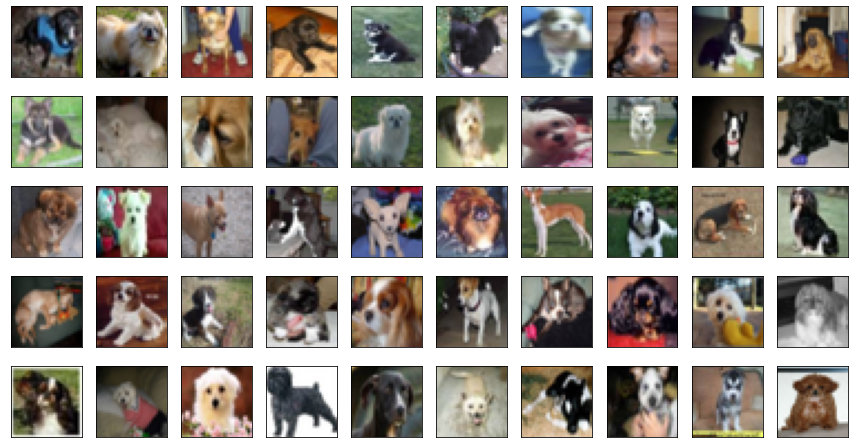

In [4]:
# 1. load/download the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
train_labels = train_labels.flatten()  # (50000, 1) -> (50000,)
test_labels = test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 4. define the 10 classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('train_images.shape =',train_images.shape)
print('train_labels.shape =',train_labels.shape)
print('test_images.shape =',test_images.shape)
print('test_labels.shape =',test_labels.shape)

# 6. lets plot some 'dogs'
[idx] = np.where(train_labels==5) # find all the dogs
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_images[idx[i]])
    plt.xticks([]), plt.yticks([])

***

- We will try different models (build, fit on training data, and evaluate on test data).

- The input layer is the images (32x32x3), and the output layer is a `softmax` 10 units (one unit for each class).

- For each model, plot the train/test loss & accuracy plots (as shown in class), and the confusion matrix.

- Summarize the results of all models in the table below:


<table>
  <tr>
    <th>Model</th>
    <th>#parameters</th>
    <th>batch-size</th>
    <th>epochs</th>
    <th>accuracy</th>
  </tr>
    
  <!-- copy this block once for every model you tested -->  
  <tr> 
    <td>1</td>   <!-- Model -->
    <td>30,730</td> <!-- #parameters -->
    <td>256</td> <!-- batch-size -->
    <td>100</td> <!-- epochs -->
    <td>0.4067</td> <!-- accuracy -->
  </tr>
  <tr> 
    <td>2</td>   <!-- Model -->
    <td>308,310</td> <!-- #parameters -->
    <td>256</td> <!-- batch-size -->
    <td>100</td> <!-- epochs -->
    <td>0.4764</td> <!-- accuracy -->
  </tr>
  <tr> 
    <td>3</td>   <!-- Model -->
    <td>5,762,902</td> <!-- #parameters -->
    <td>256</td> <!-- batch-size -->
    <td>100</td> <!-- epochs -->
    <td>0.613</td> <!-- accuracy -->
  </tr>
  <tr> 
    <td>4</td>   <!-- Model -->
    <td>242,122</td> <!-- #parameters -->
    <td>256</td> <!-- batch-size -->
    <td>100</td> <!-- epochs -->
    <td>0.66</td> <!-- accuracy -->
  </tr>
  <tr> 
    <td>5</td>   <!-- Model -->
    <td>242,122</td> <!-- #parameters -->
    <td>256</td> <!-- batch-size -->
    <td>200</td> <!-- epochs -->
    <td>0.7091</td> <!-- accuracy -->
  </tr>
  <tr> 
    <td>6</td>   <!-- Model -->
    <td>122,858</td> <!-- #parameters -->
    <td>256</td> <!-- batch-size -->
    <td>150</td> <!-- epochs -->
    <td>0.646</td> <!-- accuracy -->
  </tr>
    
 
</table>




***
### 1. No hidden layers

Just connect all inputs directly to the output layer (always remember to add a `Flatten` layer before using a `Dense` layer)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout

In [ ]:
def makeLossGraph(history):
    plt.title("loss",fontsize=30)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel('loss', fontsize=20,rotation='horizontal',position=(0,0.45))
    plt.plot(history.history['loss'],'r',label='train loss',LineWidth=2)
    plt.plot(history.history['val_loss'],'b',label='validation loss',LineWidth=2) 
    plt.grid()
    return

In [ ]:
def makeAccGraph(history):
    plt.title("accuracy",fontsize=30)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel('acc', fontsize=20,rotation='horizontal',position=(0,0.43))
    plt.plot(history.history['accuracy'],'r',LineWidth=2)
    plt.plot(history.history['val_accuracy'],'b',LineWidth=2)
    plt.grid()
    return

In [ ]:
def makeCM(preds):
   
    yhat = np.argmax(preds,axis=1)
    cm = confusion_matrix(test_labels, yhat)
    cm = cm / cm.sum(axis=1)
    plt.figure(figsize=(10,8))
    plt.title("confusion matrix:",fontsize=30)
    heatmap(cm,cmap='Blues',annot=True, fmt='.0%', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label', fontsize=20)
    plt.ylabel('True label', fontsize=20)
    plt.show()
    return

In [80]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=100, batch_size=256,validation_data=(test_images, test_labels))
preds = model.predict(test_images)
yhat = np.argmax(preds,axis=1)
acc=np.mean(yhat==test_labels)
print(acc)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
196/196 [==============================] - 1s 4ms/step - loss: 2.0759 - accuracy: 0.2523 - val_loss: 1.9872 - val_accuracy: 0.2949
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 1.9255 - accuracy: 0.3268 - val_loss: 1.9443 - val_accuracy: 0.2955
Epoch 3/100
196/196 [==============================] - 1s 4ms/step - loss: 1.8786 - accuracy: 0.3470 - val_loss: 1.9071 - val_accuracy: 0.3157
Epoch 4/100
196/196 [==============================] - 1s 4ms/step - loss: 1.8519 

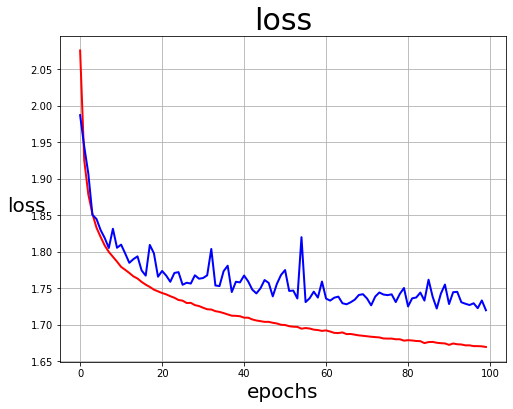

In [81]:
makeLossGraph(history)

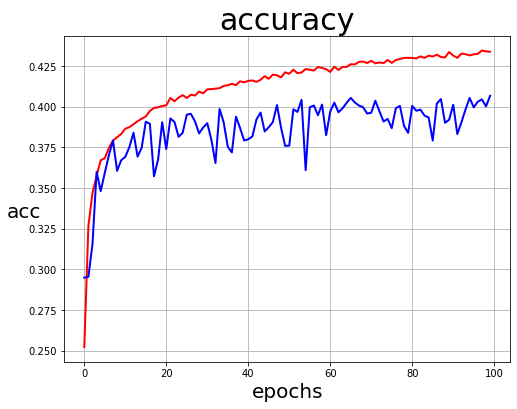

In [82]:
makeAccGraph(history)

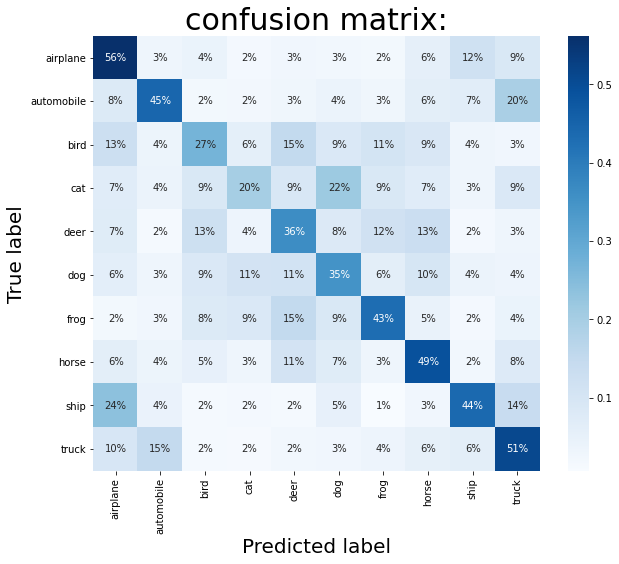

In [83]:
makeCM(preds)

***
### 2. Dense hidden layer

Add a 100-`Dense` layer (100 units) between the input and output.

In [84]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(train_images, train_labels, epochs=100, batch_size=256,validation_data=(test_images, test_labels))
preds1 = model.predict(test_images)
yhat1 = np.argmax(preds1,axis=1)
acc1=np.mean(yhat1==test_labels)
print(acc1)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
196/196 [==============================] - 1s 5ms/step - loss: 2.0680 - accuracy: 0.2503 - val_loss: 1.9516 - val_accuracy: 0.3029
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 1.9167 - accuracy: 0.3212 - val_loss: 1.8893 - val_accuracy: 0.3300
Epoch 3/100
196/196 [==============================] - 1s 4ms/step - loss: 1.8607 - accurac

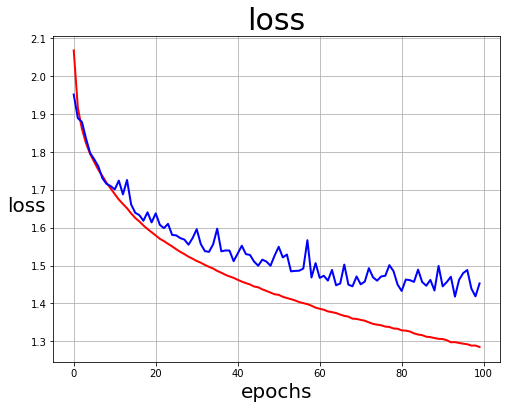

In [85]:
makeLossGraph(history1)

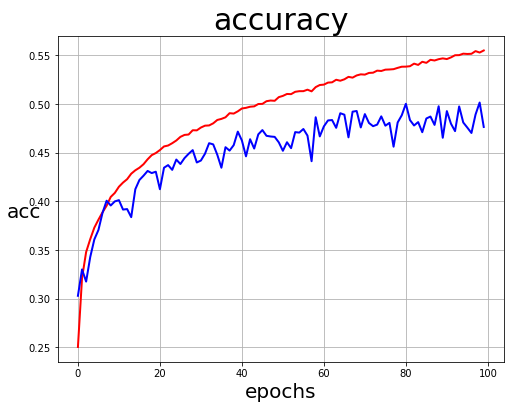

In [86]:
makeAccGraph(history1)

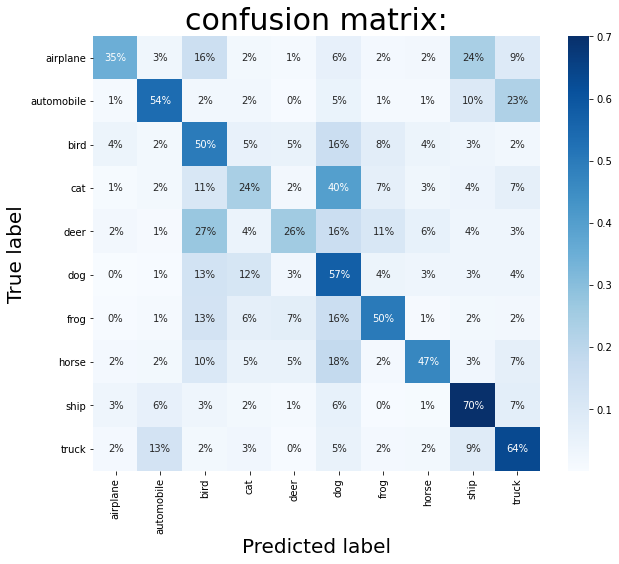

In [87]:
makeCM(preds1)

***
### 3. Simple ConvNet

Use 64 3x3 filters (`Conv2D`) between the input layer and the output layer.

In [88]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(32,32,3))) 
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=100, batch_size=256,validation_data=(test_images, test_labels))
model.summary()
preds2 = model.predict(test_images)
yhat2 = np.argmax(preds2,axis=1)
acc2=np.mean(yhat2==test_labels)
print(acc2)

Epoch 1/100
196/196 [==============================] - 2s 10ms/step - loss: 2.0551 - accuracy: 0.2628 - val_loss: 1.9044 - val_accuracy: 0.3375
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.8663 - accuracy: 0.3455 - val_loss: 1.8142 - val_accuracy: 0.3561
Epoch 3/100
196/196 [==============================] - 2s 10ms/step - loss: 1.7829 - accuracy: 0.3778 - val_loss: 1.7422 - val_accuracy: 0.3823
Epoch 4/100
196/196 [==============================] - 2s 10ms/step - loss: 1.7120 - accuracy: 0.4019 - val_loss: 1.7362 - val_accuracy: 0.3622
Epoch 5/100
196/196 [==============================] - 2s 10ms/step - loss: 1.6615 - accuracy: 0.4167 - val_loss: 1.6721 - val_accuracy: 0.4011
Epoch 6/100
196/196 [==============================] - 2s 10ms/step - loss: 1.6208 - accuracy: 0.4313 - val_loss: 1.6485 - val_accuracy: 0.4047
Epoch 7/100
196/196 [==============================] - 2s 10ms/step - loss: 1.5769 - accuracy: 0.4487 - val_loss: 1.6135 - val_accuracy:

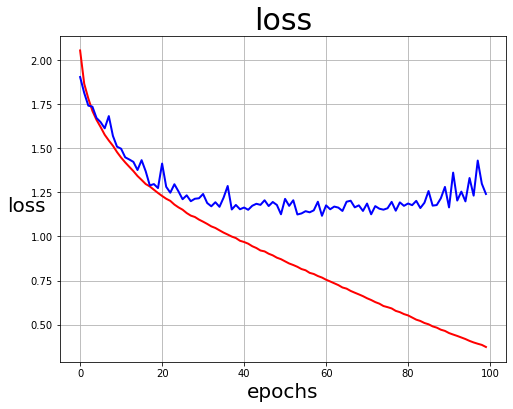

In [89]:
makeLossGraph(history2)

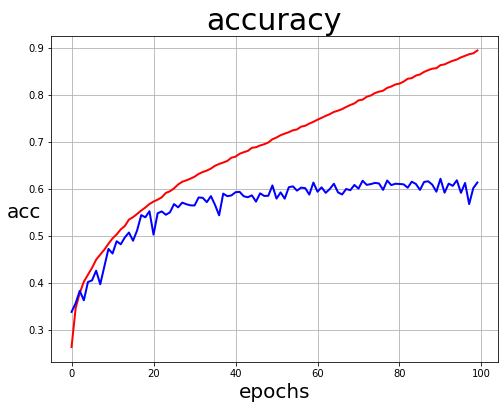

In [90]:
makeAccGraph(history2)

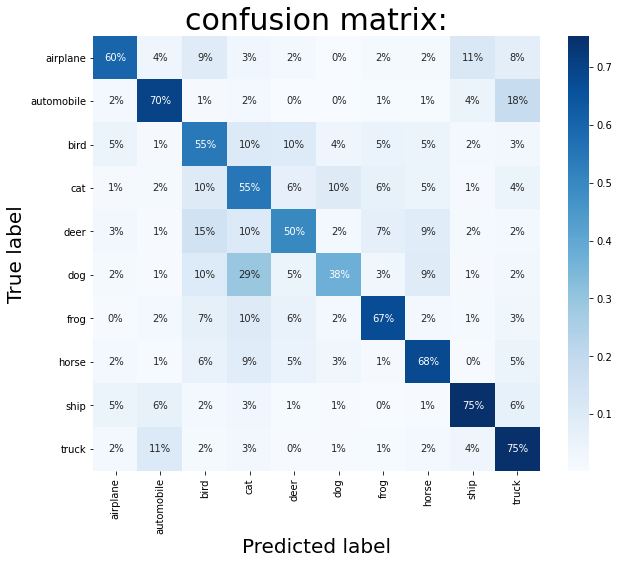

In [91]:
makeCM(preds2)

***
### 4. Bigger ConvNet

Apply the following layers (between the input and output layers):
- 32 3x3-`Conv2D` + 2x2 `MaxPooling`
- 64 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128-`Dense`

Use `padding='same'` in the Conv2D layers.

In [92]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history3 = model.fit(train_images, train_labels, epochs=100, batch_size=256,validation_data=(test_images, test_labels))
model.summary()
preds3 = model.predict(test_images)
yhat3 = np.argmax(preds3,axis=1)
acc3=np.mean(yhat3==test_labels)
print(acc3)

Epoch 1/100
196/196 [==============================] - 2s 9ms/step - loss: 2.2837 - accuracy: 0.1444 - val_loss: 2.2592 - val_accuracy: 0.1689
Epoch 2/100
196/196 [==============================] - 2s 9ms/step - loss: 2.2091 - accuracy: 0.2147 - val_loss: 2.1260 - val_accuracy: 0.2298
Epoch 3/100
196/196 [==============================] - 2s 9ms/step - loss: 2.0456 - accuracy: 0.2640 - val_loss: 1.9768 - val_accuracy: 0.2856
Epoch 4/100
196/196 [==============================] - 2s 8ms/step - loss: 1.9681 - accuracy: 0.2938 - val_loss: 1.9424 - val_accuracy: 0.2784
Epoch 5/100
196/196 [==============================] - 2s 9ms/step - loss: 1.9028 - accuracy: 0.3180 - val_loss: 1.9801 - val_accuracy: 0.2834
Epoch 6/100
196/196 [==============================] - 2s 9ms/step - loss: 1.8507 - accuracy: 0.3369 - val_loss: 1.8493 - val_accuracy: 0.3392
Epoch 7/100
196/196 [==============================] - 2s 8ms/step - loss: 1.7903 - accuracy: 0.3590 - val_loss: 1.7938 - val_accuracy: 0.3494

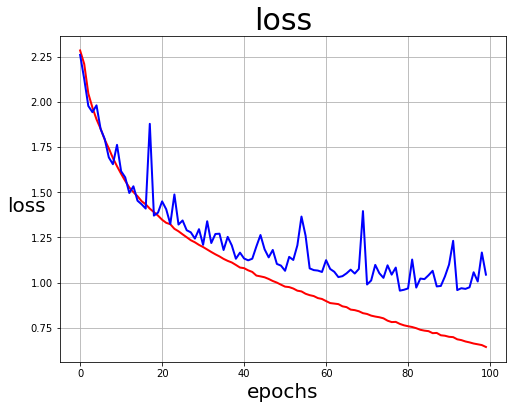

In [93]:
makeLossGraph(history3)

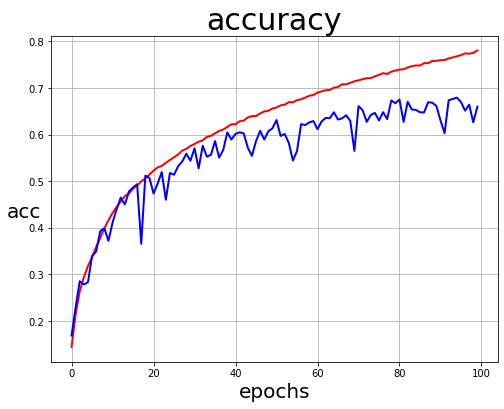

In [94]:
makeAccGraph(history3)

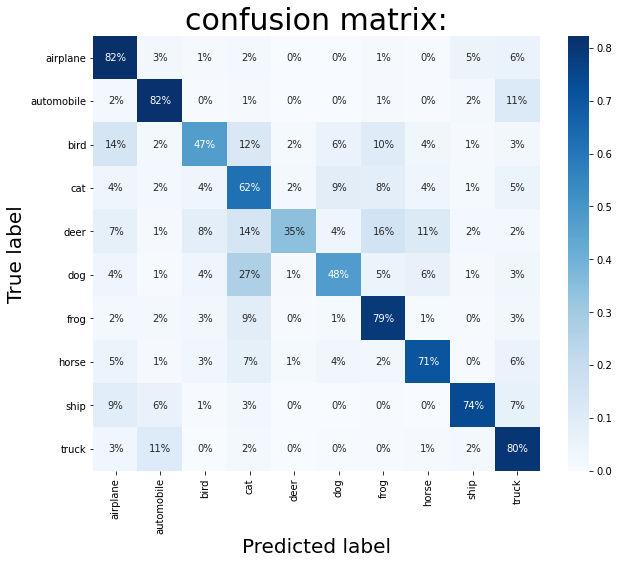

In [95]:
makeCM(preds3)

***
### 5. Add regularization

Add a `Dropout` layer (experiment with its `rate` parameter) between the 128-`Dense` layer and the output layer. 

In [96]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history4 = model.fit(train_images, train_labels, epochs=200, batch_size=256,validation_data=(test_images, test_labels))
model.summary()
preds4 = model.predict(test_images)
yhat4 = np.argmax(preds4,axis=1)
acc4=np.mean(yhat4==test_labels)
print(acc4)

Epoch 1/200
196/196 [==============================] - 2s 9ms/step - loss: 2.2919 - accuracy: 0.1281 - val_loss: 2.2735 - val_accuracy: 0.2129
Epoch 2/200
196/196 [==============================] - 2s 9ms/step - loss: 2.2546 - accuracy: 0.1749 - val_loss: 2.2097 - val_accuracy: 0.2194
Epoch 3/200
196/196 [==============================] - 2s 9ms/step - loss: 2.1711 - accuracy: 0.2093 - val_loss: 2.0863 - val_accuracy: 0.2476
Epoch 4/200
196/196 [==============================] - 2s 9ms/step - loss: 2.0935 - accuracy: 0.2292 - val_loss: 2.0123 - val_accuracy: 0.2829
Epoch 5/200
196/196 [==============================] - 2s 8ms/step - loss: 2.0457 - accuracy: 0.2450 - val_loss: 1.9637 - val_accuracy: 0.3096
Epoch 6/200
196/196 [==============================] - 2s 9ms/step - loss: 2.0101 - accuracy: 0.2677 - val_loss: 1.9235 - val_accuracy: 0.3105
Epoch 7/200
196/196 [==============================] - 2s 9ms/step - loss: 1.9701 - accuracy: 0.2864 - val_loss: 1.9016 - val_accuracy: 0.3202

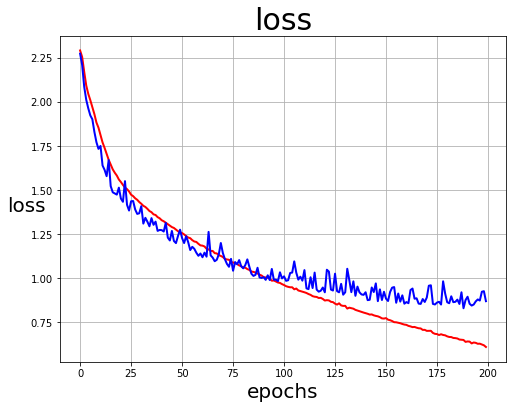

In [97]:
makeLossGraph(history4)

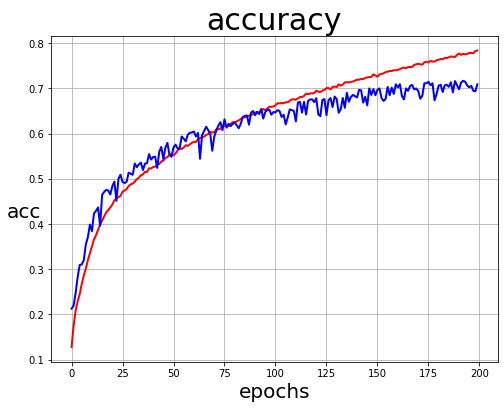

In [98]:
makeAccGraph(history4)

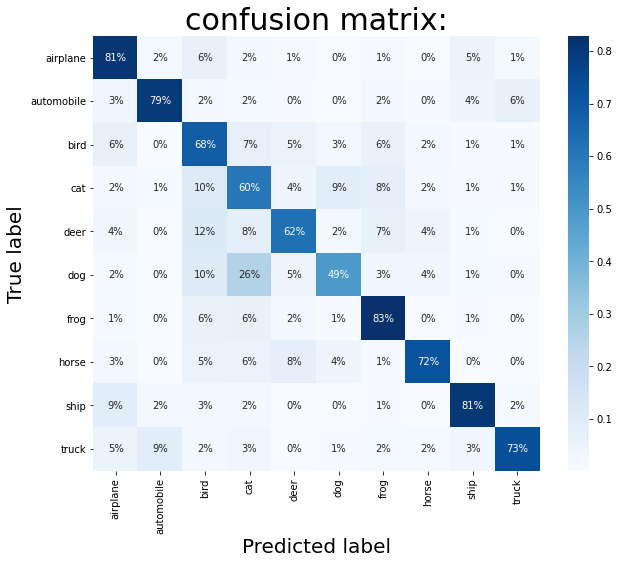

In [99]:
makeCM(preds4)

***
### another exemple:

In [107]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu',input_shape=(32,32,3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history5 = model.fit(train_images, train_labels, epochs=150, batch_size=256,validation_data=(test_images, test_labels))
model.summary()
preds5 = model.predict(test_images)
yhat5 = np.argmax(preds5,axis=1)
acc5=np.mean(yhat5==test_labels)
print(acc5)

Epoch 1/150
196/196 [==============================] - 2s 8ms/step - loss: 2.3012 - accuracy: 0.1093 - val_loss: 2.2964 - val_accuracy: 0.1319
Epoch 2/150
196/196 [==============================] - 1s 7ms/step - loss: 2.2934 - accuracy: 0.1240 - val_loss: 2.2857 - val_accuracy: 0.1647
Epoch 3/150
196/196 [==============================] - 1s 7ms/step - loss: 2.2820 - accuracy: 0.1365 - val_loss: 2.2662 - val_accuracy: 0.1795
Epoch 4/150
196/196 [==============================] - 1s 7ms/step - loss: 2.2606 - accuracy: 0.1471 - val_loss: 2.2244 - val_accuracy: 0.1752
Epoch 5/150
196/196 [==============================] - 1s 7ms/step - loss: 2.2164 - accuracy: 0.1627 - val_loss: 2.1527 - val_accuracy: 0.2181
Epoch 6/150
196/196 [==============================] - 1s 7ms/step - loss: 2.1713 - accuracy: 0.1745 - val_loss: 2.1115 - val_accuracy: 0.2291
Epoch 7/150
196/196 [==============================] - 1s 7ms/step - loss: 2.1429 - accuracy: 0.1857 - val_loss: 2.0801 - val_accuracy: 0.2265

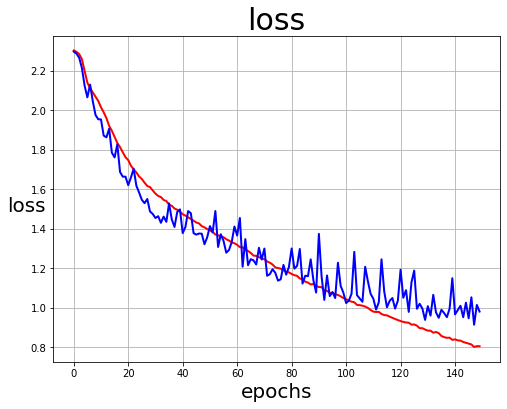

In [103]:
makeLossGraph(history5)

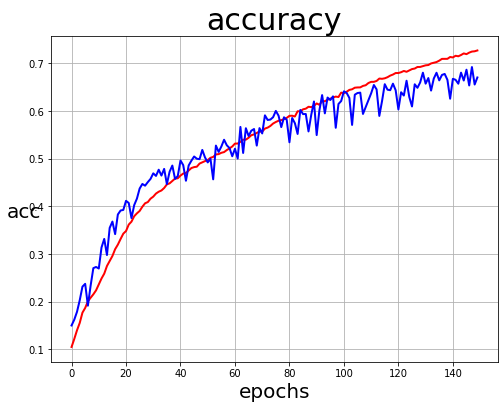

In [104]:
makeAccGraph(history5)

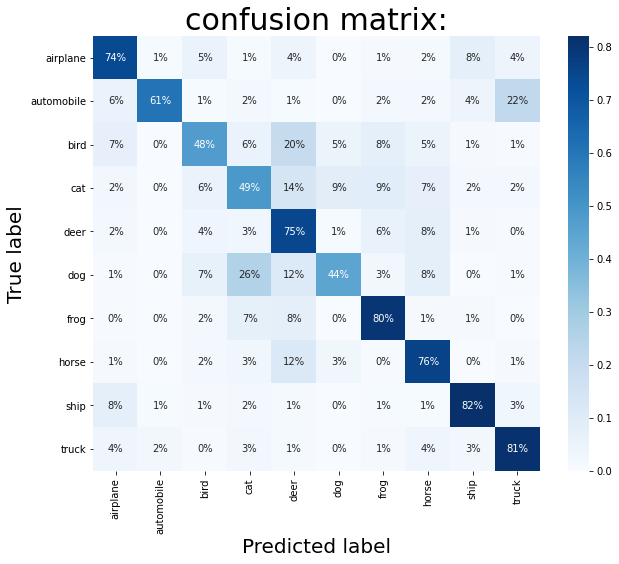

In [105]:
makeCM(preds5)

***
## Good Luck!